In [ ]:
pip install numpy

In [ ]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=2abf944c2a391116f284d2c66cfa08306b0c48169c7db323751671dafbd0a7eb
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
pip install matplotlib

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


Inflow Rate: 49.99999999999999


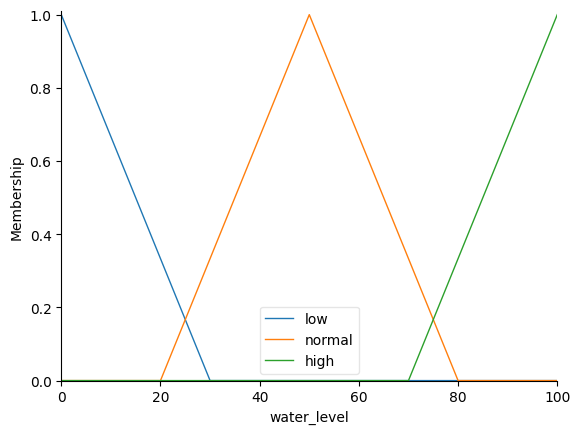

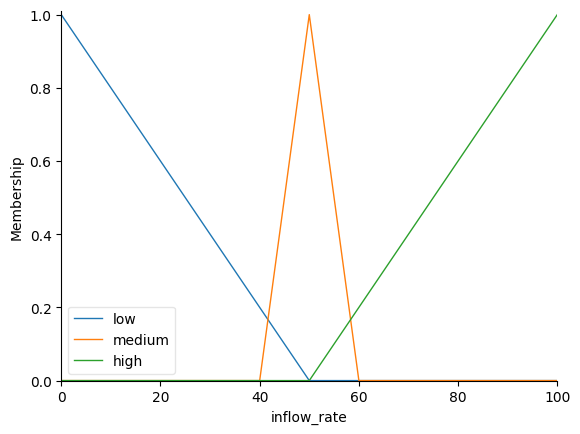

In [ ]:
# Define the input and output variables
water_level = ctrl.Antecedent(np.arange(0, 101, 1), 'water_level')
inflow_rate = ctrl.Consequent(np.arange(0, 101, 1), 'inflow_rate')

# Define linguistic terms (fuzzy sets) for water level
water_level['low'] = fuzz.trimf(water_level.universe, [0, 0, 30])
water_level['normal'] = fuzz.trimf(water_level.universe, [20, 50, 80])
water_level['high'] = fuzz.trimf(water_level.universe, [70, 100, 100])

# Define linguistic terms (fuzzy sets) for inflow rate
inflow_rate['low'] = fuzz.trimf(inflow_rate.universe, [0, 0, 50])
inflow_rate['medium'] = fuzz.trimf(inflow_rate.universe, [40, 50, 60])
inflow_rate['high'] = fuzz.trimf(inflow_rate.universe, [50, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(water_level['low'], inflow_rate['high'])
rule2 = ctrl.Rule(water_level['normal'], inflow_rate['medium'])
rule3 = ctrl.Rule(water_level['high'], inflow_rate['low'])

# Create a control system
water_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Simulate the system with specific input
water_sim = ctrl.ControlSystemSimulation(water_ctrl)
water_sim.input['water_level'] = 45  # Input water level

# Compute the output
water_sim.compute()

# Get the output
inflow_rate_output = water_sim.output['inflow_rate']

print("Inflow Rate:", inflow_rate_output)

# Visualize the membership functions and the result
water_level.view()
inflow_rate.view()
plt.show()
